# <center>  Perceptron - 06 / 10 / 2020 </center>#

* <span style="color:red">Cours</span>            : MICAS911-Introduction-To-Statistic-Learning
* <span style="color:red">Auteur</span>           : Bournhar Abdelaziz
* <span style="color:red">Auteur</span>           : Panongbene Jean Mohamed Sawadogo

# <center> <span style="color:red"><font size="+3"> Assignment Perceptron </font></span> </center> #



In [594]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [595]:
%matplotlib inline

# Data Generation

In [596]:
def generateData(N, mu_1, mu_2, sigma_2, matrix_cov):
    # Data Generate Gaussian Distribution
    X1 = np.random.multivariate_normal(mu_1, matrix_cov, N//2)
    X2 = np.random.multivariate_normal(mu_2, matrix_cov, N//2)
    X = np.concatenate((X1,X2),axis=0)

    # Label Generate
    Y1 = np.ones(N//2, dtype=int)
    Y2 = np.zeros(N//2, dtype=int)
    Y = np.append(Y1,Y2)
    
    return X, Y
def plotData(X, Y):
    # We plot the Gaussian Distribution
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

In [597]:
#The size of data is N = 200
N = 200

# Gaussian mean for distribution label 1 
mu_1 = np.array([1,0])

# Gaussian mean for distribution label 0
mu_2 = np.array([-1,0])

# standar deviation for Gaussian Distribution
sigma_2 = 0.3 #0.75
matrix_cov =sigma_2* np.array([[1, 0],[0, 1]]) 

In [598]:
X, Y = generateData(N, mu_1, mu_2, sigma_2, matrix_cov)

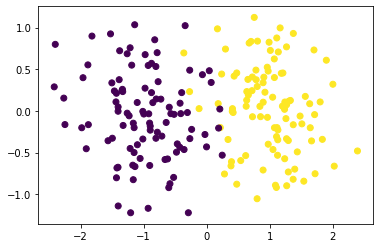

In [599]:
plotData(X, Y)

# Percepton's logic implementation

In [600]:
def forward(X, W, b):
    """This function compute <W,X>+b"""
    return np.sum(W*X)+b


def heavisideFunction(x):
    """this function compute the hard limiter"""
    return np.heaviside(x,0)
    """
    if x>0:
        return 1
    else:
        return 0
    """
    
    
def prediction(X, W, b):
    """This function return the prediction"""
    v = forward(X,W,b)
    return heavisideFunction(v)


def trainingEpochs(X, Y, W, b, N, nepochs, learningRate):
    """This function take a sampling data and train the perceptron"""
    
    lossTraining = list()
    for epoch in range(nepochs) :
        errorsEpoch = 0
        lossTrainingEpoch = list()
        print("------------------ Epoch : ",epoch,"------------------")
        for i in range(N):

            # predict the class of sample i (X[i])
            y = prediction(X[i],W,b)

            # update the weights
            W = W + learningRate*(Y[i]-y)*X

            # save the loss
            lossTrainingEpoch.append(np.abs(Y[i]-y))

        # The number of errors made on the training phase    
        errorsEpoch = np.sum(lossTrainingEpoch)
        print("Errors in epoch ", epoch , " >> ", errorsEpoch)
        print("Accuracy on training in epoch ", epoch ," : ", 1- errorsEpoch/N)
    
    
    print("\n")
    
    return W, lossTraining

def training(X, Y, W, b, N, learningRate):
    """This function take a sampling data and train the perceptron"""
    
    lossTrainingEpoch = list()
    for i in range(N):

        # predict the class of sample i (X[i])
        y = prediction(X[i],W,b)

        # update the weights
        err = Y[i]-y
        W = W + learningRate*err*X

        # save the loss
        lossTrainingEpoch.append(np.abs(Y[i]-y))

    # The number of errors made on the training phase    
    errorsEpoch = np.sum(lossTrainingEpoch)

    print("[TRAIN] Errors : ", errorsEpoch)
    print("[TRAIN] Accuracy on training  : ", 1- (errorsEpoch/N))
        
    return W, lossTrainingEpoch

def testing(X, Y, W, N, b) :
    """This function is used to test the perceptron"""
    
    errors = 0
    y_pred = np.empty(N, int)
    
    for i in range(N):
        # we compute the prediction based on X and the weights W
        y = prediction(X, W, b)
        
        # saving the prediction
        np.append(y_pred, np.array([y]), axis=0)
        
        # if we have made an error, we must update the weight for the next iteration [w(i+1)]
        if y != Y[i] :
            errors += 1
            
    print("[TEST] Total errors = ", errors)
    print("[TEST] Accuracy = ", 1- errors/N)
    
    return y_pred

## Question 1 : Evaluate the computational complexity of the perceptron in terms of arithmetic operations per iteration.

The complexity of perceptron for one iteration is O(N) where N = 2 is in this case because N is the dimension of one elements of X

In [601]:
#bias
b = 1

# weights 
weights = np.zeros(2, dtype=int)

# learning rate
learningRate = 0.01

# loss error training 
lossTraining = list()

# Number of epochs
nepochs = 5

### Generating the training data

In [602]:
#The size of data is N = 200
N = 200

# Gaussian mean for distribution label 1 
mu_1 = np.array([1,0])

# Gaussian mean for distribution label 0
mu_2 = np.array([-1,0])

# standar deviation for Gaussian Distribution
sigma_2 = 0.3 #0.75
matrix_cov =sigma_2* np.array([[1, 0],[0, 1]]) 

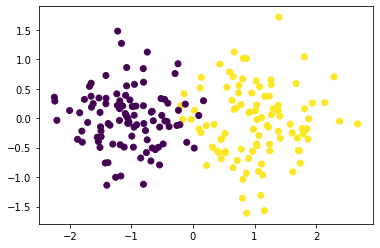

In [603]:
X_train, Y_train = generateData(N, mu_1, mu_2, sigma_2, matrix_cov)
plotData(X_train, Y_train)

### Training phase

In [604]:
learningRates = [0 , .0001, .002 , .05 , .08, .5 , 1, 30]
lossTraining = list()
 
for lr in learningRates :
    lossTraining = list()
    W = np.zeros(2, dtype=int)
    
    print("------------------------------ Learning Rate = ",lr,"------------------------------")
    W, lossTraining = training(X, Y, W, b, N, learningRate)
    
    #plt.hist(lossTraining)
    #plt.show()

------------------------------ Learning Rate =  0 ------------------------------
[TRAIN] Errors :  97.0
[TRAIN] Accuracy on training  :  0.515
------------------------------ Learning Rate =  0.0001 ------------------------------
[TRAIN] Errors :  97.0
[TRAIN] Accuracy on training  :  0.515
------------------------------ Learning Rate =  0.002 ------------------------------
[TRAIN] Errors :  97.0
[TRAIN] Accuracy on training  :  0.515
------------------------------ Learning Rate =  0.05 ------------------------------
[TRAIN] Errors :  97.0
[TRAIN] Accuracy on training  :  0.515
------------------------------ Learning Rate =  0.08 ------------------------------
[TRAIN] Errors :  97.0
[TRAIN] Accuracy on training  :  0.515
------------------------------ Learning Rate =  0.5 ------------------------------
[TRAIN] Errors :  97.0
[TRAIN] Accuracy on training  :  0.515
------------------------------ Learning Rate =  1 ------------------------------
[TRAIN] Errors :  97.0
[TRAIN] Accuracy on t

<ErrorbarContainer object of 3 artists>

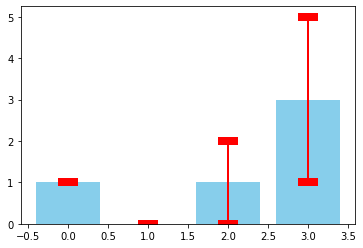

In [605]:
values = [1, 0, 1, 3]
errorValues = [0, 0, 1, 2]
plt.bar(range(len(values)), values, color = 'skyblue')
plt.errorbar(range(len(values)), values, yerr = errorValues,fmt = 'none', capsize = 10, ecolor = 'red', elinewidth = 2, capthick = 8)

## Testing 

In [606]:
#The size of data is N = 200
N = 200

# Gaussian mean for distribution label 1 
mu_1 = np.array([1,0])

# Gaussian mean for distribution label 0
mu_2 = np.array([-1,0])

# standar deviation for Gaussian Distribution
sigma_2 = 0.3 #0.75
matrix_cov =sigma_2* np.array([[1, 0],[0, 1]]) 

In [607]:
X_test, Y_test = generateData(N, mu_1, mu_2, sigma_2, matrix_cov)

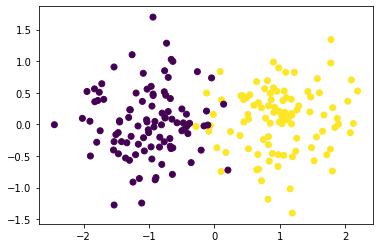

In [608]:
plotData(X_test, Y_test)

In [609]:
W

array([[-9.34977315e-01,  7.45886399e-02],
       [ 1.16669375e-01, -2.68488674e-02],
       [-5.24300955e-01,  5.77931489e-01],
       [-3.97059569e-01, -2.67421352e-02],
       [-6.17724744e-01, -2.25593566e-01],
       [-7.82029126e-01, -8.12657626e-01],
       [-9.32456939e-01, -5.09022821e-01],
       [-1.94199488e+00, -3.10781823e-01],
       [-1.10232064e+00, -6.86772675e-01],
       [-1.08244880e+00,  1.94185018e-01],
       [-7.77748626e-01, -2.84318339e-01],
       [-7.76146118e-01,  1.02200265e+00],
       [-1.01534205e+00, -1.59855305e-01],
       [-2.74022565e-01,  7.33950306e-01],
       [-8.68092310e-01,  6.88013480e-01],
       [-1.66790146e+00,  7.31018771e-01],
       [ 2.62886996e-01, -2.24657311e-01],
       [-1.33342023e+00, -9.02184454e-01],
       [-1.61350271e+00,  3.49002995e-01],
       [-1.04050760e+00, -6.05326815e-01],
       [-8.19265276e-01, -5.32003902e-02],
       [-1.84113941e+00, -5.90541721e-01],
       [-1.59376359e+00,  1.95574251e-01],
       [-9.

In [610]:
y_pred = testing(X_test, Y_test, W, N, b)

[TEST] Total errors =  100
[TEST] Accuracy =  0.5
